In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
advertise=pd.read_csv('advertising.csv')

In [4]:
advertise.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


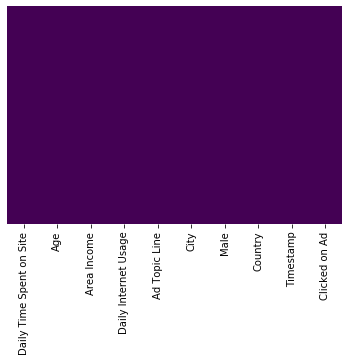

In [5]:
sns.heatmap(advertise.isnull(),yticklabels=False,cbar=False,cmap='viridis')

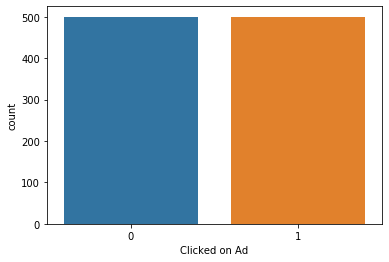

In [6]:
sns.countplot('Clicked on Ad',data=advertise)

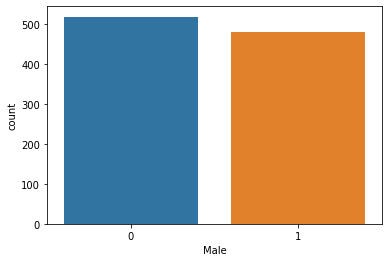

In [7]:
sns.countplot(x='Male',data=advertise)

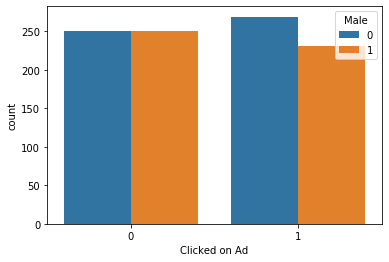

In [8]:
sns.countplot(x='Clicked on Ad',hue='Male',data=advertise)

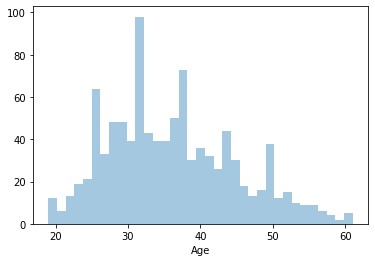

In [9]:
sns.distplot(advertise['Age'],kde=False,bins=35)

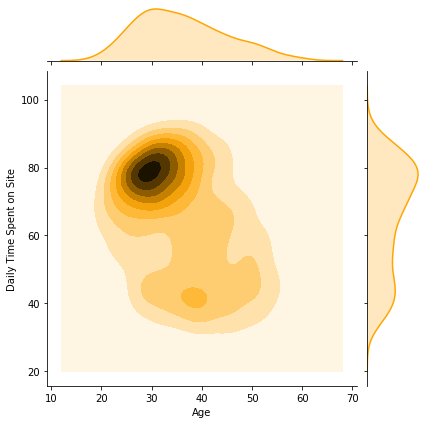

In [10]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=advertise,color='#FFA500',kind='kde')

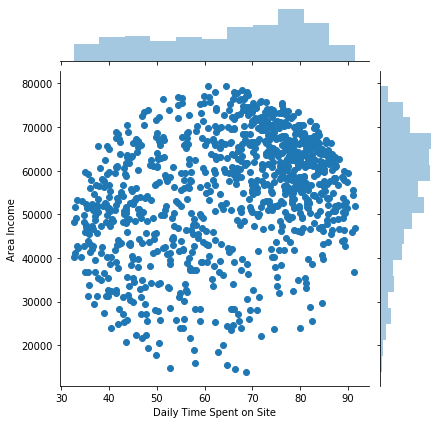

In [11]:
sns.jointplot('Daily Time Spent on Site','Area Income',advertise)

/home/shivam/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/shivam/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


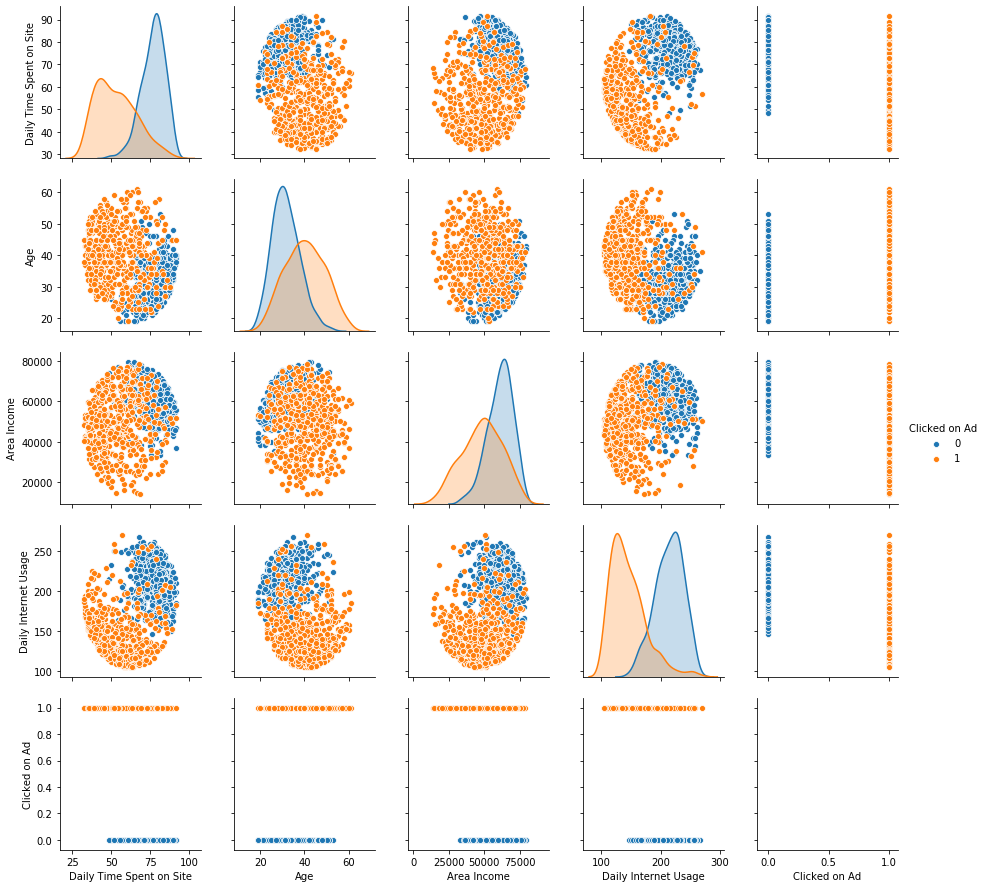

In [12]:
sns.pairplot(advertise.drop('Male',axis=1),hue='Clicked on Ad')

# Data visualisation observation

1. Those who spend less time on site they are more likely to click on ad
2. Younger people are more likely to visit on ad
3. People with higher income are more likely to visit ad
4. People with higher data usage are more likey to clcik on ad

In [13]:
advertise.drop(['Ad Topic Line','Country','Timestamp','City'],inplace=True,axis=1)

In [14]:
advertise.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=advertise.drop('Clicked on Ad',axis=1)
y=advertise['Clicked on Ad']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression(solver='lbfgs',max_iter=1000)

In [19]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(model,X_train,y_train,cv=10)
score.mean()

0.9001250432330327

In [20]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction=model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

